In [27]:
import numpy as np
import librosa
from scipy import signal
from scipy import fft
%matplotlib notebook
import matplotlib.pyplot as plt

In [28]:
data, fs = librosa.load("test/house_chantiers_83.wav")
print("File opened")

File opened


<IPython.core.display.Javascript object>


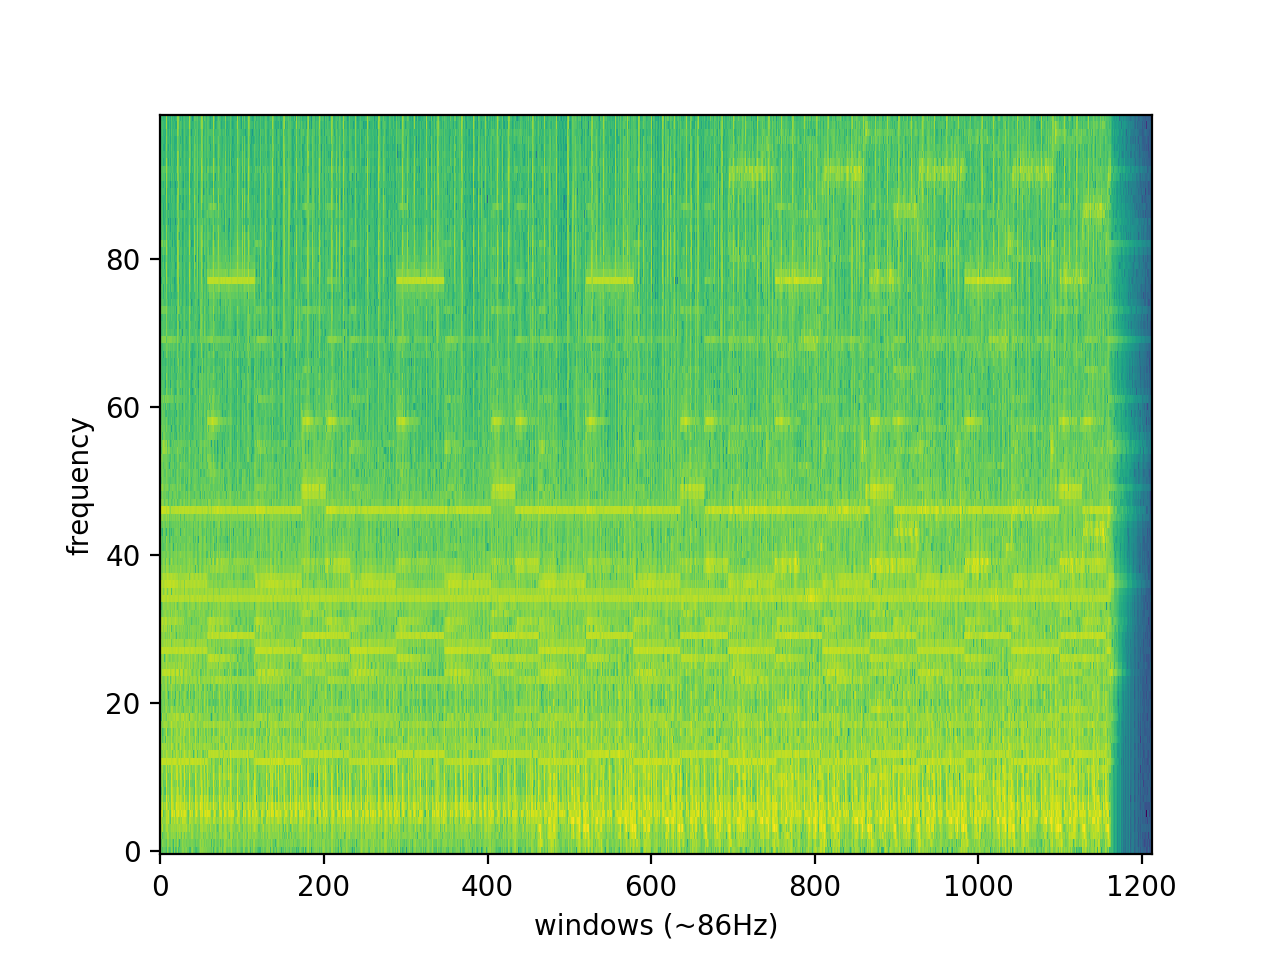

<IPython.core.display.Javascript object>


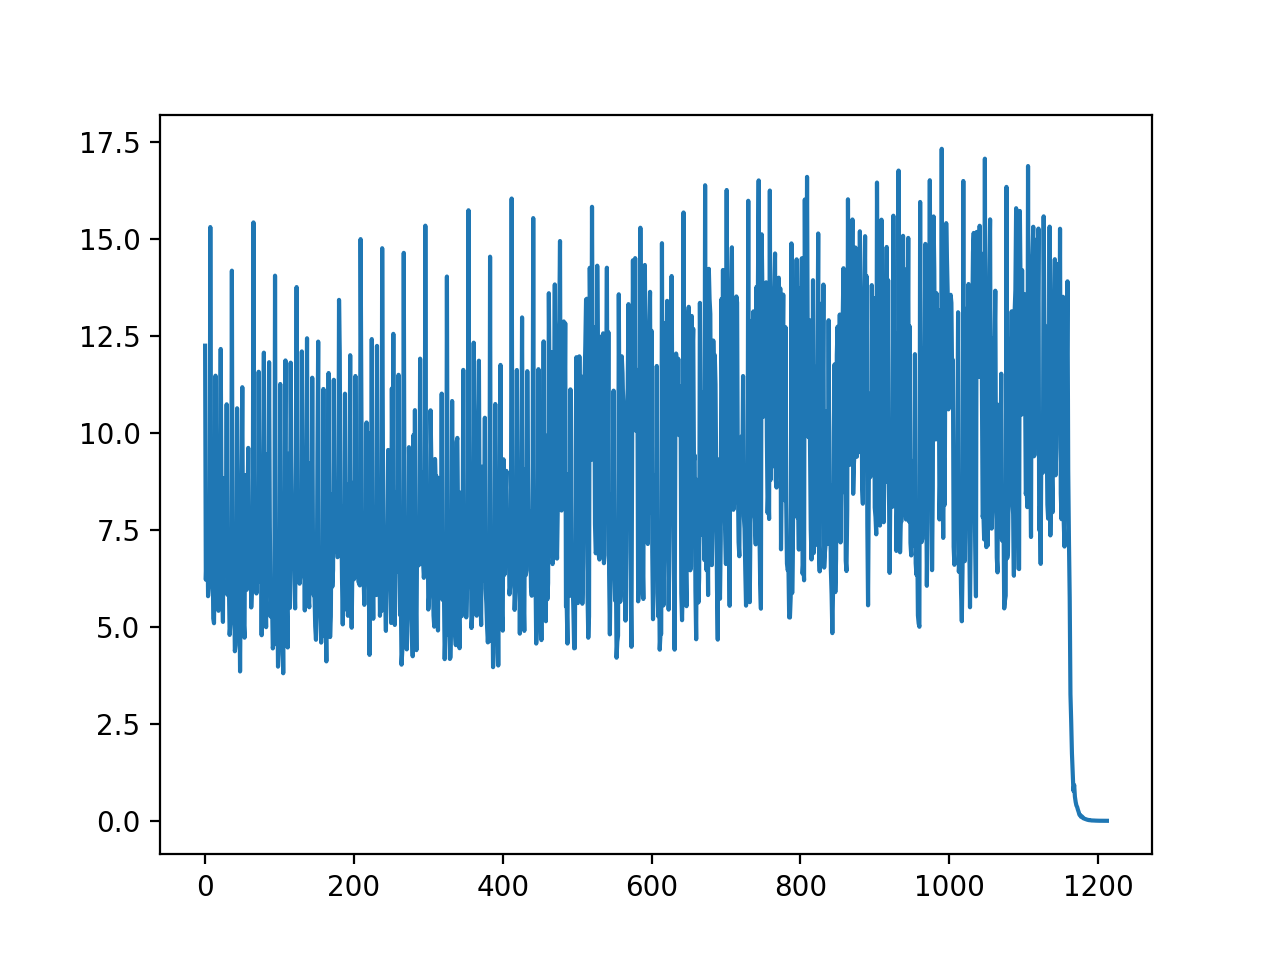

In [38]:
window_size = 2048  # 2048-sample fourier windows
stride = 2205        # 512 samples between windows
wps = fs/float(stride) # number of windows by second
Xs = np.empty([int(((data.shape[0]-window_size)/fs)*wps),window_size])

for i in range(Xs.shape[0]):
    Xs[i] = np.abs(fft(data[i*stride:i*stride+window_size]))

Xs = Xs[:, :100]
envelope = np.mean(Xs, 1)



fig = plt.figure(1)
plt.imshow(np.log(Xs.T[0:150]),aspect='auto')
plt.gca().invert_yaxis()
fig.axes[0].set_xlabel('windows (~86Hz)')
fig.axes[0].set_ylabel('frequency')
plt.show()

fig = plt.figure(2)
plt.plot(envelope)
plt.show()


<IPython.core.display.Javascript object>


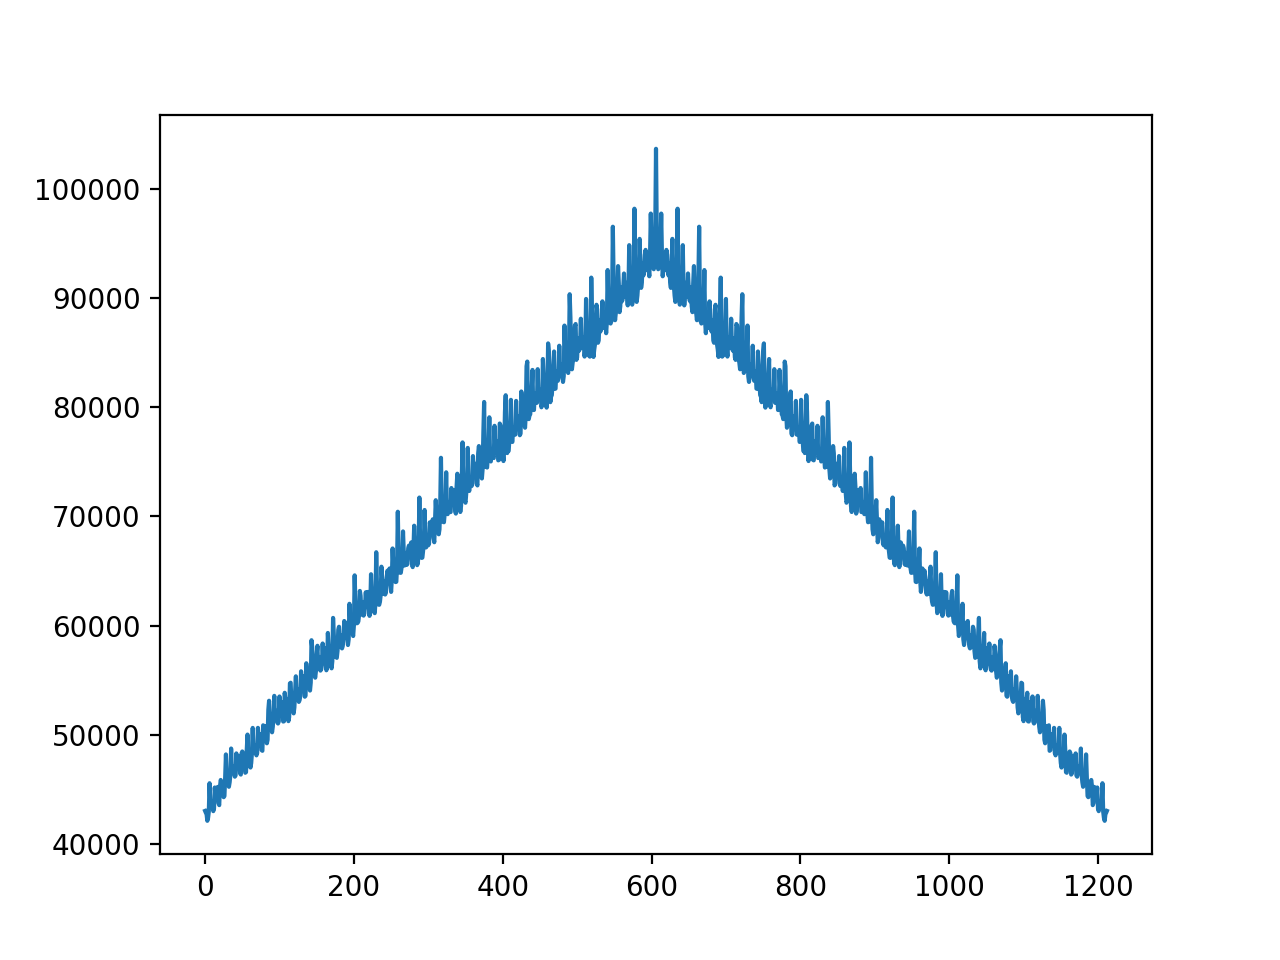

<IPython.core.display.Javascript object>


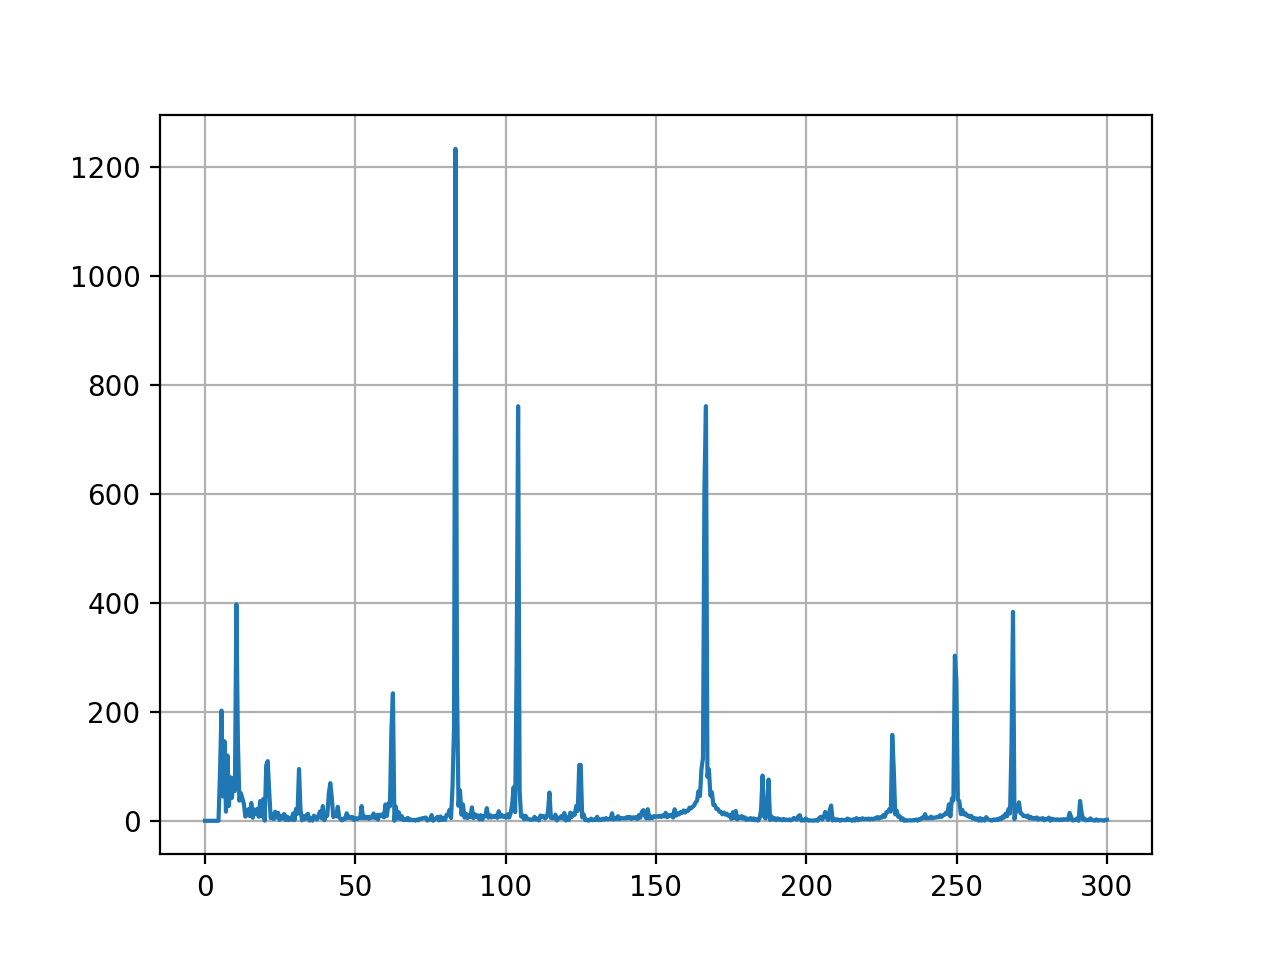

83.30578512396694


In [39]:
corr = np.correlate(envelope, envelope, mode="same")
fig = plt.figure(3)
plt.plot(corr)
plt.show()

yf = fft(corr)
yf[:10] = 0 # We filter the low frequencies to remove the autocor side effects
xf = np.linspace(0.0, 1.0/(2.0/wps), len(corr)//2)*60
fig = plt.figure(4)
plt.plot(xf, 2.0/len(corr)*np.abs(yf[0:len(corr)//2]))
plt.grid()
plt.show()

print(xf[np.argmax(2.0/len(corr)*np.abs(yf[0:len(corr)//2]))])
